1. Basic graph attributes: how many nodes and (undirected) edges are in this network? (0.5 point)}

In [1]:
import networkx as nx

# Read city info
def read_cities(file_path):
    cities = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('|')
            if len(parts) == 3:
                city_id = int(parts[1])
                city_name = parts[2].strip()
                cities[city_id] = city_name
    return cities

# Read connection info
def read_connections(file_path):
    connections = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                connections.append((int(parts[0]), int(parts[1])))
    return connections

# Construct graph
def create_graph(cities, connections):
    G = nx.Graph()
    for city_id, city_name in cities.items():
        G.add_node(city_id, name=city_name)
    for connection in connections:
        G.add_edge(connection[0], connection[1])
    return G


cities_file_path = 'global-cities.dat'
connections_file_path = 'global-net.dat'
cities = read_cities(cities_file_path)
connections = read_connections(connections_file_path)

G = create_graph(cities, connections)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 3883
Number of edges: 14142


2. How many connected components are in this graph, how many nodes and edges do the largest component contain? (0.5 point)}

In [4]:
import networkx as nx

# Get the number of connected components
num_components = nx.number_connected_components(G)

# Get all connected components as subgraphs
components = list(nx.connected_components(G))
#print(components)

# Find the largest component
largest_component = max(components, key=len)

# Create a subgraph of the largest component
largest_subgraph = G.subgraph(largest_component)

# Get the number of nodes and edges in the largest component
largest_nodes = largest_subgraph.number_of_nodes()
largest_edges = largest_subgraph.number_of_edges()

# Print results
print("Number of connected components:", num_components)
print("Largest component contains:")
print("  Nodes:", largest_nodes)
print("  Edges:", largest_edges)


Number of connected components: 266
Largest component contains:
  Nodes: 3618
  Edges: 14142


3. Denote the largest component as $G$. List the top 10 nodes in G having the highest degree, and how many other nodes are they connected to. Please give names of the city/airport, node ids will not be accepted. (0.5 point)

In [5]:
# Get the degrees of nodes in the largest component
largest_degrees = sorted(largest_subgraph.degree(), key=lambda x: x[1], reverse=True)

# Get the top 10 nodes by degree
top_10_nodes = largest_degrees[:10]

# Print results with city/airport names
print("Top 10 nodes in the largest component by degree:")
for node, degree in top_10_nodes:
    city_name = G.nodes[node]['name']  # Get city/airport name from node attributes
    print(f"{city_name}: {degree} connections")


Top 10 nodes in the largest component by degree:
Paris: 250 connections
London (GB): 242 connections
Frankfurt: 237 connections
Amsterdam: 192 connections
Moscow: 186 connections
Chicago: 184 connections
New York: 179 connections
Atlanta: 172 connections
Dallas/Fort Worth: 147 connections
Houston: 144 connections


4. Plot the degree distribution of the network $G$. Each data point is a pair (x,y) where x is a positive integer and y is the fraction of nodes in the network with degree equal to x.  
Also plot the degree distribution on a log-log scale. Restrict the range of x between the minimum and maximum degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes. Include numeric labels on each axes for the reader to make sense of the plot. (1 point)}

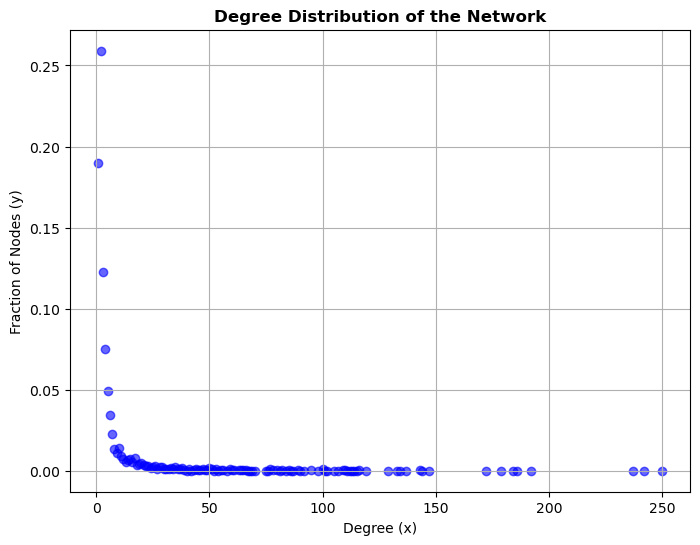

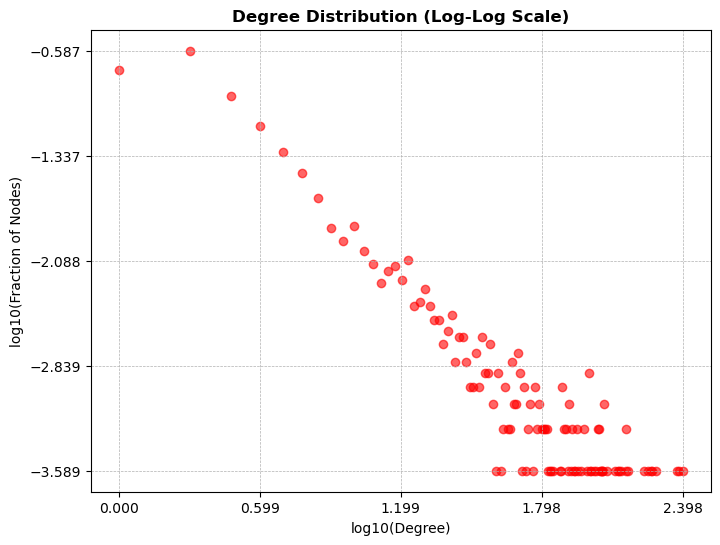

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.makedirs('./Figure',exist_ok=True)

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]  # List of all node degrees
degree_counts = {x: degree_sequence.count(x) for x in set(degree_sequence) if x!=0}  # Count occurrences of each degree

# Compute fraction of nodes with each degree
total_nodes = G.number_of_nodes()
degree_distribution = {k: v / total_nodes for k, v in degree_counts.items()}

# Sort values for plotting
x_values = sorted(degree_distribution.keys())
y_values = [degree_distribution[x] for x in x_values]

# Filter out zero entries
x_values = np.array(x_values)
y_values = np.array(y_values)
valid_indices = y_values > 0
x_values = x_values[valid_indices]
y_values = y_values[valid_indices]

# Plot degree distribution (linear scale)
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.6)
plt.xlabel("Degree (x)")
plt.ylabel("Fraction of Nodes (y)")
plt.title("Degree Distribution of the Network",fontweight='bold')
plt.grid(True)
plt.savefig('./Figure/DegreeDistribution.pdf')
plt.show()

# Log-log transformation with base 10
log_x = np.log10(x_values)
log_y = np.log10(y_values)

# Plot degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(log_x, log_y, color='red', alpha=0.6)
plt.xlabel("log10(Degree)")
plt.ylabel("log10(Fraction of Nodes)")
plt.xticks(np.linspace(log_x.min(), log_x.max(), num=5))  # Numeric labels for x-axis
plt.yticks(np.linspace(log_y.min(), log_y.max(), num=5))  # Numeric labels for y-axis
plt.title("Degree Distribution (Log-Log Scale)",fontweight='bold')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig('./Figure/DegreeDistribution_log.pdf')
plt.show()



5. What is the (unweighted) diameter of the giant component $G$ in this network? List a longest (unweighted) shortest path between two cities. Please give names of the city/airport, node ids will not be accepted. (1 point)

In [24]:
largest_component = max(nx.connected_components(G), key=len)
largest_subgraph = G.subgraph(largest_component).copy()

# Compute the diameter (longest shortest path)
diameter = nx.diameter(largest_subgraph)

# Find the pair of nodes with the longest shortest path
pairs = dict(nx.all_pairs_shortest_path_length(largest_subgraph))

# Identify the pair with the maximum shortest path length (diameter)
max_pair = None
max_distance = 0
for node1 in pairs:
    for node2, distance in pairs[node1].items():
        if distance == diameter:
            max_pair = (node1, node2)
            break
    if max_pair:
        break  # Stop after finding one longest shortest path

# Retrieve the actual path
longest_shortest_path = nx.shortest_path(largest_subgraph, source=max_pair[0], target=max_pair[1])
print(longest_shortest_path)

# Convert node IDs to city names
city_names_path = [G.nodes[node]['name'] for node in longest_shortest_path]

# Print results
print("Diameter of the largest component:", diameter)
print("Longest shortest path between two cities:")
print(" → ".join(city_names_path))


[477, 166, 2027, 2524, 506, 2734, 433, 92, 362, 2470, 1668, 1260, 1487, 1454, 2948, 730, 1661, 3414]
Diameter of the largest component: 17
Longest shortest path between two cities:
Brize Norton → Georgetown (XV) → Mount Pleasant → Punta Arenas → Concepcion (CL) → Santiago (CL) → Buenos Aires → Auckland → Brisbane → Port Moresby → Lae → Indagen → Konge → Kabwum → Satwag → Derim → Yalumet → Wasu


6.What is the smallest number of flights you need to take to get from Canberra (CBR) to Cape Town (CPT)? 
Which airports does your route take you through? Please give names of the city/airport, node ids will not be accepted. (0.5 point)

In [25]:
# Define source and target airports
source_airport = None
target_airport = None

# Find the corresponding node IDs for Canberra (CBR) and Cape Town (CPT)
for node, data in G.nodes(data=True):
    if data['name'] == "Canberra":
        source_airport = node
    elif data['name'] == "Cape Town":
        target_airport = node

# Check if both airports exist in the graph
if source_airport and target_airport:
    # Compute shortest path (unweighted, minimum number of flights)
    shortest_path = nx.shortest_path(G, source=source_airport, target=target_airport)
    
    # Convert node IDs to airport names
    airport_names_path = [G.nodes[node]['name'] for node in shortest_path]

    # Print results
    print("Smallest number of flights from Canberra to Cape Town:", len(shortest_path) - 1)
    print("Route:")
    print(" → ".join(airport_names_path))
else:
    print("Error: Canberra or Cape Town airport not found in the dataset.")



Smallest number of flights from Canberra to Cape Town: 3
Route:
Canberra → Melbourne (AU) → Mauritius → Cape Town


7. Which airport/city in $G$ is most ``central'' by having the largest betweeness, list the top 10 cities with their betweeness value? (1 point)}

In [26]:
# Compute betweenness centrality for all nodes
betweenness = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality in descending order
top_10_cities = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert node IDs to city names and print results
print("Top 10 most central cities by betweenness centrality:")
for node, centrality in top_10_cities:
    city_name = G.nodes[node]['name']
    print(f"{city_name}: {centrality:.6f}")



Top 10 most central cities by betweenness centrality:
Paris: 0.081100
London (GB): 0.073780
Anchorage: 0.070772
Singapore: 0.065423
New York: 0.060146
Los Angeles (US): 0.057513
Frankfurt: 0.056929
Port Moresby: 0.055840
Tokyo: 0.052298
Seattle: 0.045471
